## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues 
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Business Requirment:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [395]:
#importing the necessary libraries for the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data understanding, preparation and EDA


In [396]:
bikedt= pd.read_csv('BikeSharing.csv')
bikedt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [397]:
bikedt.shape

(730, 16)

In [398]:
bikedt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [399]:
# To get statistical inference of the numerical variables

bikedt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observation from the Given Data 

- There no null columns
- The difference between mean and median are very small, there can be less or no outliers 
- There are some irrelavant varibles for our model building ,which can be dropped
    - 'instant' , 'dteday', 'casual' and 'registered'

### Dropping off the irrelevant columns 

In [400]:
bikedt= bikedt.drop(['instant','dteday','casual','registered'],axis = 1)
bikedt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the numerical variables

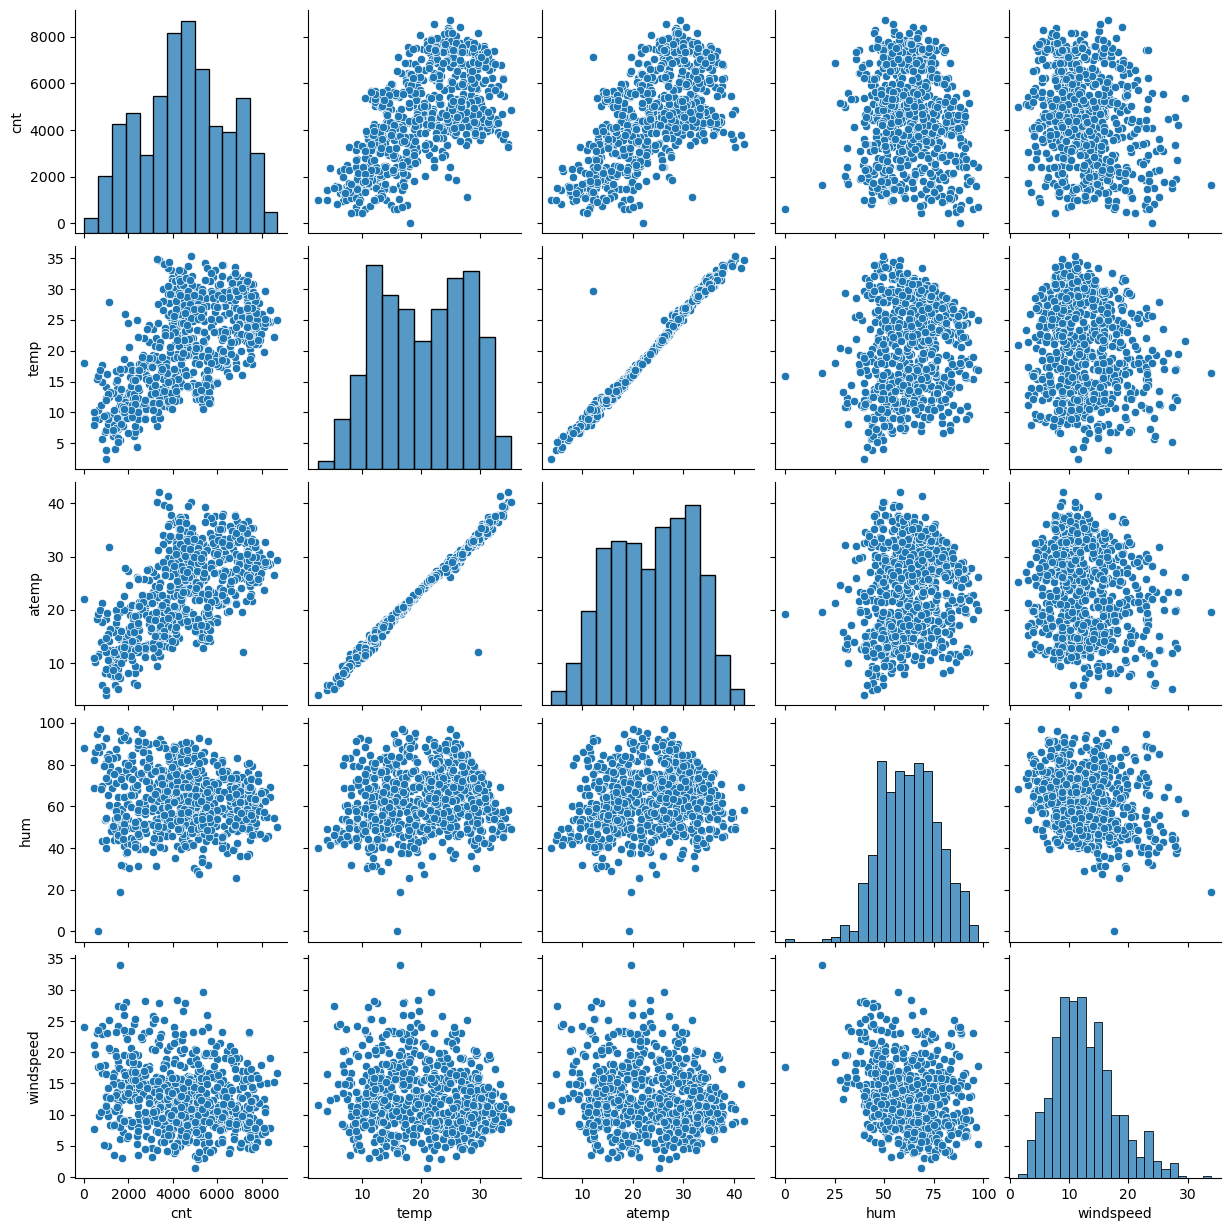

In [401]:
sns.pairplot(data=bikedt,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

plt.show()

### Visualizing Categorical variables

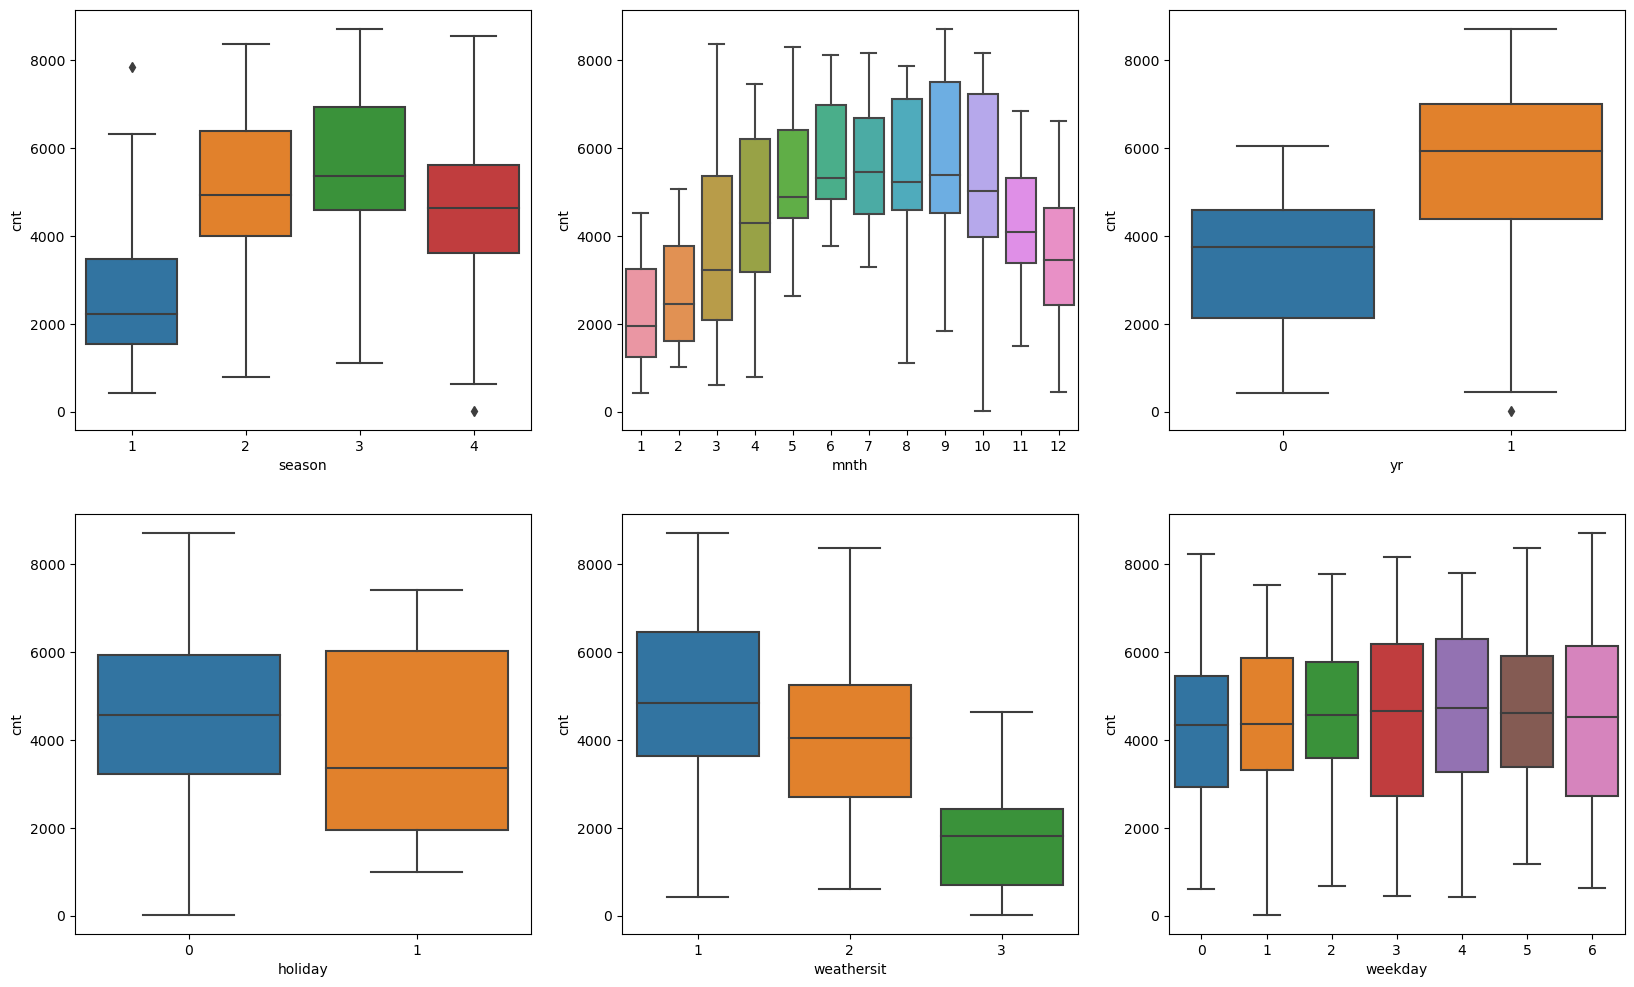

In [402]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikedt)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=bikedt)
plt.subplot(2,3,3)
sns.boxplot(x='yr',y='cnt',data=bikedt)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikedt)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=bikedt)
plt.subplot(2,3,6)
sns.boxplot(x='weekday',y='cnt',data=bikedt)
plt.show()


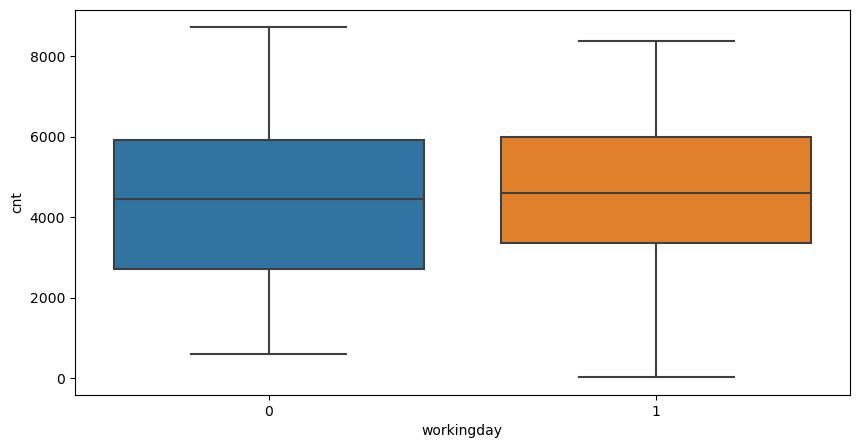

In [403]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedt)
plt.show()

### Observation from data visualization

- There are outliers in the given data

### Observation on the predictor variables 

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

In [404]:
# chi2 test to determine the dependency of the categorical variable in the given data

from scipy.stats import chi2_contingency
 
stat, p, dof, expected = chi2_contingency(bikedt)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


### Converting numerical values of the categorical data to readable values

In [405]:
# Converting Mon as Jan , Feb ...

import calendar

bikedt['mnth'] = bikedt['mnth'].apply(lambda x: calendar.month_abbr[x])

In [406]:
## maping seasons

bikedt.season = bikedt.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [407]:
## mapping weathersit

bikedt.weathersit = bikedt.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [408]:
bikedt.weekday = bikedt.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [409]:
# Check the dataframe after alll the necessary conversion

bikedt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables for Non Binary categorical variables

In [410]:
dummy = bikedt[['season','mnth','weekday','weathersit']]

In [411]:
dummy =pd.get_dummies(dummy,drop_first=True)

In [412]:
## adding dummy variables to original dataset

bikedt = pd.concat([dummy,bikedt],axis = 1)

In [413]:
bikedt.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [414]:
## dropping the original columns for which dummy variables were created
bikedt= bikedt.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1)

In [415]:
bikedt.head()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [416]:
print(bikedt.shape)

(730, 30)


## Step 2 : Model Building

In [417]:
# Spliting the data set as train and test data sets

np.random.seed(0)
df_train, df_test =train_test_split(bikedt, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [418]:
# # Rescaling the numerical variables of train data set using MinMaxScaler

scaler = MinMaxScaler()

# Numerical variable list
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [419]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


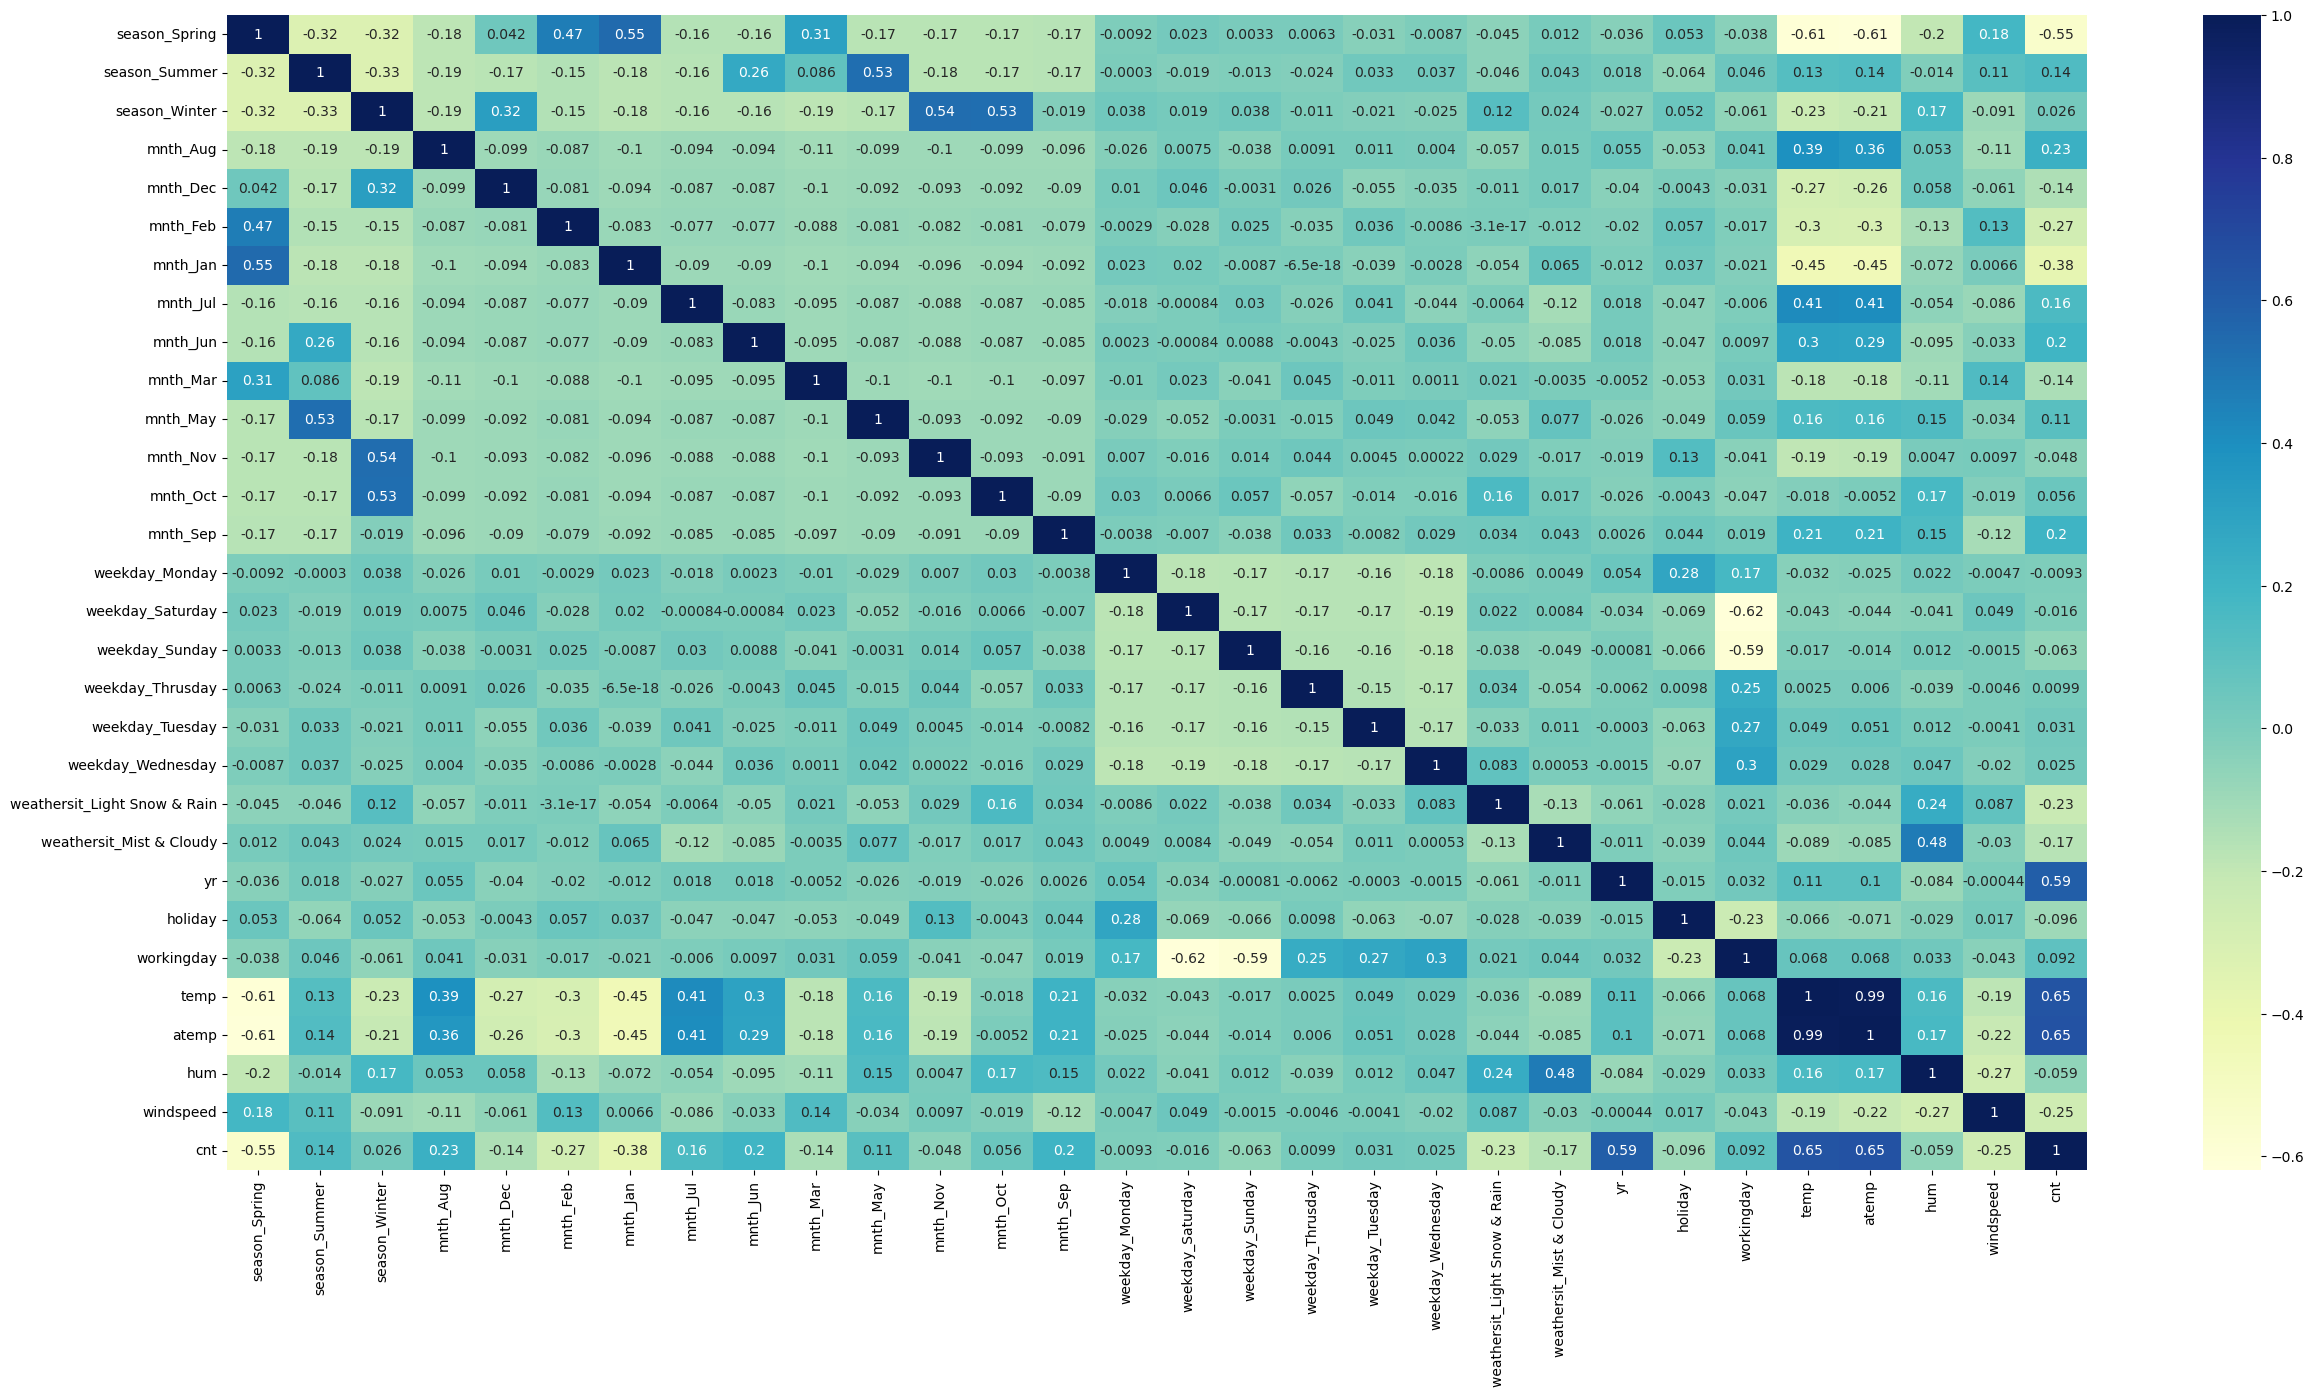

In [420]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Defining X and y sets for Train data 

In [421]:
y_train= df_train.pop('cnt')
X_train= df_train

In [422]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) # running RFE to fetch Top 10 variables from the train data set
rfe = rfe.fit(X_train, y_train)

In [423]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', False, 2),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 13),
 ('mnth_Feb', False, 11),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 20),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 12),
 ('weekday_Thrusday', False, 19),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 18),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', False, 3),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [424]:
#Print Columns selected by RFE. 

#We will start with these columns and then do  manual elimination as necessary

col = X_train.columns[rfe.support_]
col

Index(['season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [425]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [426]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [427]:
# Create a first fitted model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [428]:
# Print a summary of the linear regression model obtained

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.79e-186
Time:                        21:45:43   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### There are no variables from the RFE selected features with p >0.05

In [429]:
# Calculate the VIFs for the above model to detrmine the multicollinearity

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
8,temp,1.53
3,mnth_Jul,1.43
1,season_Summer,1.33
2,season_Winter,1.28
9,hum,1.26
4,mnth_Sep,1.19
10,windspeed,1.16
5,weathersit_Light Snow & Rain,1.11
6,yr,1.03


- In general we want varaibles with VIF that is less than 5.
- There are no varaibles which has VIF greater than 5 except for const
- As const is the intercept , we will not remove from the data set

### We have our finalized data set for further Analysis

### Residual Analysis of the train data

In [430]:
y_train_pred= lm.predict(X_train_rfe)
y_train_pred

576    0.688680
426    0.532200
728    0.366695
482    0.635875
111    0.268530
         ...   
578    0.796284
53     0.245872
350    0.306406
79     0.308007
520    0.690897
Length: 510, dtype: float64

In [431]:
res= y_train -y_train_pred
res

576    0.138977
426   -0.066945
728   -0.162600
482   -0.152902
111   -0.077435
         ...   
578    0.036551
53    -0.027855
350    0.006180
79    -0.071583
520    0.112026
Length: 510, dtype: float64

Text(0.5, 1.0, 'Residual Analysis of Bike Sharing Demand Prediction Model')

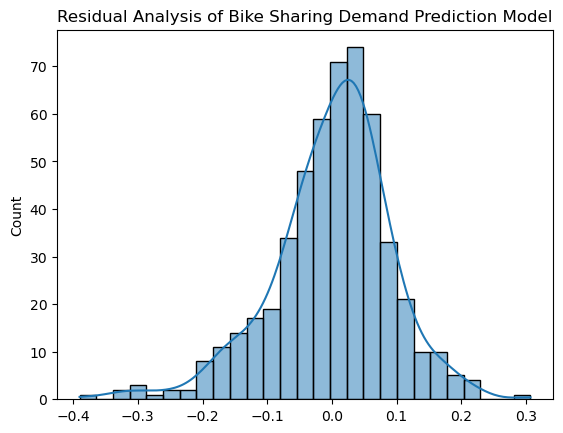

In [432]:
plt.figure()
sns.histplot(res,kde=True)
plt.title("Residual Analysis of Bike Sharing Demand Prediction Model")

### STEP 3 - Prediction and Evaluation of Test Set

- We only do transform on the test set , we will not fit the test set 
- As , we do not want the model to learn the test set 

In [433]:
# Re-scaling the test data as we did with Train data

df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


### Defining X and y for test data set

In [434]:
y_test= df_test['cnt']
X_test =df_test

In [435]:
#Creating X_test dataframe with Final selected variables as same as the Train data set
X_test_rfe = X_test[col]

In [436]:
X_test_rfe.columns

Index(['season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')


- The test data set have been rescaled with the similar criteria as that of train data set
- The variables in both the data set are same


In [437]:
df_test.describe() 

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [438]:
X_test_rfe = sm.add_constant(X_test_rfe)

In [439]:
# Making predictions using the final test model

y_test_pred = lm.predict(X_test_rfe)

In [440]:
r2_score(y_test, y_test_pred)

0.8038201600802428

In [441]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.009380197699652934

## R-squared score on the test set is 0.8038

### Model Evaluation

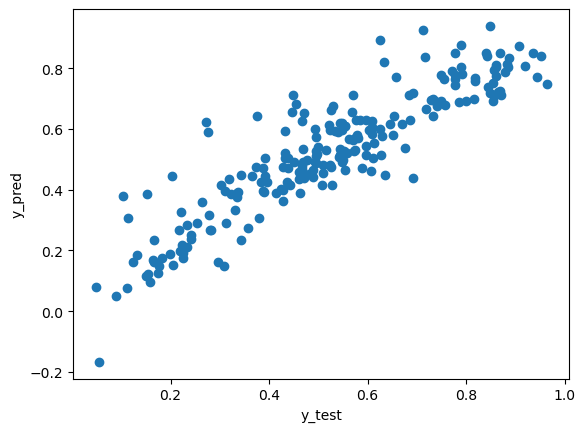

In [442]:
# Plotting y_test and y_pred to understand the spread

#fig = plt.figure()
plt.scatter(y_test, y_test_pred)
#plt.plot(y_test, y_test_pred,'r')
fig.suptitle('y_test vs y_test_pred', fontsize = 10)         # Plot heading 
plt.xlabel('y_test', fontsize = 10)                          # X-label
plt.ylabel('y_pred', fontsize = 10)  

plt.show() # Shows the Linearity of the test data

In [443]:
# Printing the coefficient of the predictor variables

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
8,temp,0.619981
0,const,0.268203
6,yr,0.225886
2,season_Winter,0.138953
4,mnth_Sep,0.094378
1,season_Summer,0.079967
3,mnth_Jul,-0.048206
7,holiday,-0.093018
5,weathersit_Light Snow & Rain,-0.191358


We can see that the equation of our best fitted line is:

## [ cnt = 0.268203 + 0.619981*temp + 0.225886*yr + 0.138953*season_Winter + 0.094378*mnth_Sep  + 0.079967*season_ Summer  - 0.048206*mnth_Jul - 0.191358*weathersit_Light Snow & Rain - 0.093018*holiday - 0.205869*windspeed - 0.286785*hum ]

- All the positive coefficients like temp,yr indicate that an increase in these values will lead to an increase in the value of cnt.
- All the negative coefficients lihe hum and windndspeed indicate that an increase in these values will lead to an decrease in the  value of cnt.
- Temp is the most significant with the largest coefficient.
- Bike rentals is more for the month of september
- The rentals reduce during holidays
